## K Means Clustering

#### **Overview**

k-Means clustering is a **centroid-based, unsupervised clustering algorithm** that partitions data into a fixed number of clusters by minimizing within-cluster variance. The algorithm alternates between assigning points to the nearest centroid and updating centroid locations.

This notebook demonstrates the application of a **custom k-means clustering algorithm** to a multidimensional dataset. The example emphasizes the role of **feature scaling, distance metrics, initialization strategies, and the choice of k.**

The goals of this notebook are to:
 - Understand the k-means clustering objective
 - Determine the appropriate k for clustering
 - Explore the impact of centroid initialization
 - Apply a k-means algorithm implemented from scratch

In [1]:
import sys
import os
from pathlib import Path

# 1. Add the project root's 'src' directory to the Python path
current_dir = os.getcwd()
# Assuming notebook is three levels deep from project root
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

Added project source directory to sys.path: /Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src


In [2]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# import all of the functions from k means clustering src
# NOTE: If load_data or load_and_prepare_data is defined in preprocessing, it must be imported.
from rice_ml.processing.preprocessing import (get_features,
                                              get_feature_types,
                                              create_preprocessor,
                                              load_and_prepare_data) # Added load_and_prepare_data
from rice_ml.unsupervised_learning.k_means_clustering import (plot_elbow_curve,
                                                              plot_silhouette_scores,
                                                              train_kmeans,
                                                              evaluate_clustering,
                                                              plot_pca_clusters,
                                                              plot_cluster_distribution,
                                                              cluster_vs_target,
                                                              cluster_numeric_summary
                                                              )

from pathlib import Path # Import Path for use below


In [7]:
##  Load data

repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")

data_path = Path("../../../Data/Obesity_DataSet.csv")



# load dataset

df = pd.read_csv(data_path)


In [8]:
# Preoprocessing 

# Prepare features
X = get_features(df)

# Feature types
num_features, cat_features = get_feature_types()

# Preprocessing
preprocessor = create_preprocessor(num_features, cat_features)

# Transform data once for evaluation plots
X_processed = preprocessor.fit_transform(X)


Once everything has been loaded and the data has been prepared for the algortithm, we can begin training the model. For K-means clustering, we need to start by picking the k, or number of clusters which could be done by looking at the elbow curve. From the graph, we can see that the elbow of the data is around k = 5, but it is a bit difficult to determine.

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

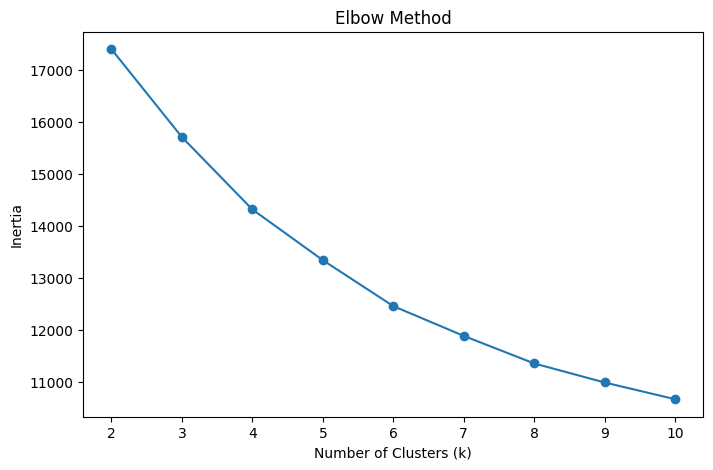

In [9]:
plot_elbow_curve(X_processed)

Since we did not get a clear answer from the elbow graph, we can instead try a Silhouette Score Analysis. In this chart, a higher value means clearer defined clusters. Since this is the first iteration, the silhouette analysis shows overall weak clustering, but we can still see that 4 clusters seems to provide the most separation. Thus, we will use k = 4.

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

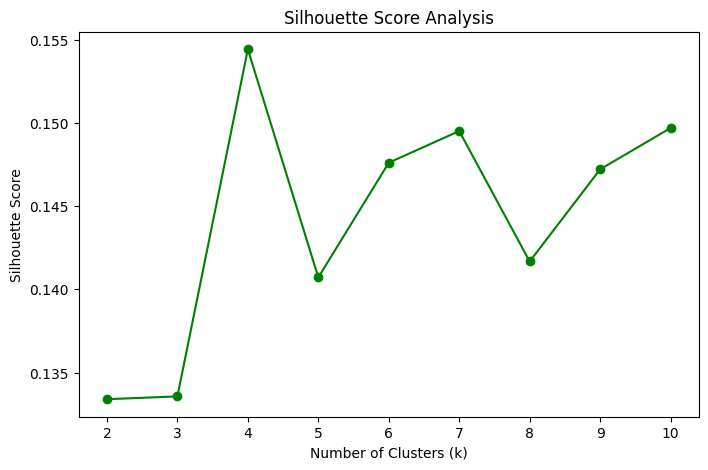

In [10]:
plot_silhouette_scores(X_processed)

Once K has been selected, we can begin training the model! We are running the model for 50 iterations. Each time, the model will propose an improved set of centroids (cluster centers) that more accurately sort the data.

In [11]:
# define k
optimal_k = 4

# Train final model
pipeline, clusters = train_kmeans(preprocessor, X, optimal_k)

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: divide by zero encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: overflow encountered in matmul
  current_pot = closest_dist_sq @ sample_weight
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:237: RuntimeWarning: invalid value encountered in m

In [12]:
df["Cluster"] = clusters


Once the machine has learned, we can evaluate how well the model did. We can determine this by looking at the Silhouette score of the final clusters (0.155) and also a map of the final clusters. The map appears to have 4 distinct clusters, as demarcated by the clusters, but there is some overlap; it is hard to separate some of the observations.

In [13]:
# Silhouette Analysis Score
sil_score = evaluate_clustering(X_processed, clusters)
print(f"Silhouette Score: {sil_score:.3f}")

Silhouette Score: 0.155


/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value enc

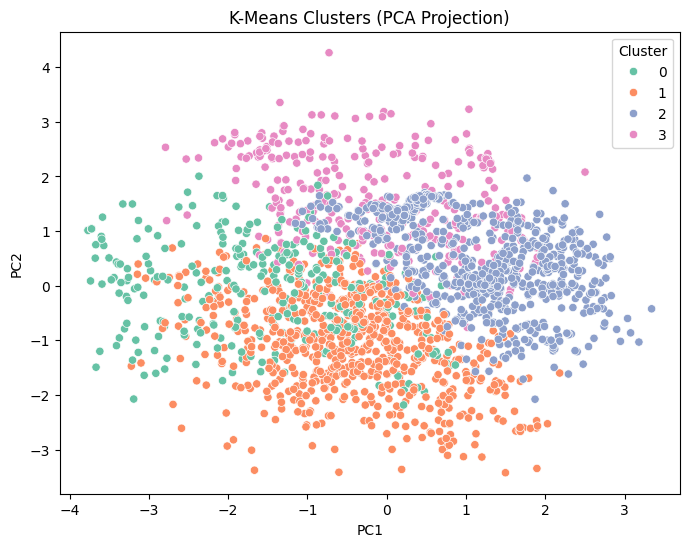

In [14]:
# Plot of final clusters
plot_pca_clusters(X_processed, clusters)

In addition to the spatial map of the clusters, we can look at the distribution of variables within each cluster. First, we can see the number of observations assigned to each cluster. This can be done across the entire cluster, as in the bar chart, or broken down by variable in the next table.

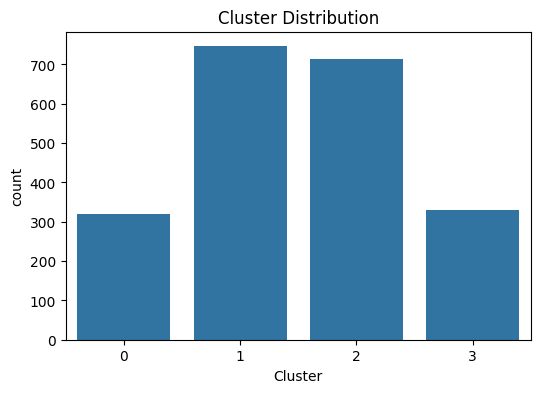

In [15]:
# Bar Chart: distribution of observations in clusters
plot_cluster_distribution(df)

In [16]:
# Table: distribution of observation variables in clusters
print(cluster_vs_target(df))

NObeyesdad  Insufficient_Weight  Normal_Weight  Obesity_Type_I  \
Cluster                                                          
0                            53             52              65   
1                           209            205             104   
2                             7              8              88   
3                             3             22              94   

NObeyesdad  Obesity_Type_II  Obesity_Type_III  Overweight_Level_I  \
Cluster                                                             
0                        29                 0                  78   
1                         4                 0                 119   
2                       202               324                  38   
3                        62                 0                  55   

NObeyesdad  Overweight_Level_II  
Cluster                          
0                            43  
1                           105  
2                            47  
3                 

We can also see the average values of each variable within the clusters. This is a great way to see if the observations were actually matched into the correct clusters. As we can see, there are clear differences in values in many of the variables between the clusters (especially Age, Weight, and NCP), indicating that the algorithm did its job.

In [17]:
print(cluster_numeric_summary(df, num_features))

               Age    Height      Weight      FCVC       NCP      CH2O  \
Cluster                                                                  
0        21.556632  1.639768   72.020040  2.340878  1.192907  1.933332   
1        20.573767  1.686745   67.122798  2.259402  3.114694  1.917077   
2        24.083182  1.751557  113.628572  2.654453  2.965730  2.229287   
3        35.898351  1.687589   86.200449  2.346605  2.557515  1.807840   

              FAF       TUE  
Cluster                      
0        0.734128  0.721909  
1        1.270769  0.893350  
2        0.887181  0.577410  
3        0.955822  0.238773  
